# WITH PANDAS AND MATPLOTLIB

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
%matplotlib notebook
x = np.linspace(-20,20,100)
y = np.sin(x)/x
plt.plot(x,y);

<IPython.core.display.Javascript object>

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [6]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [7]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


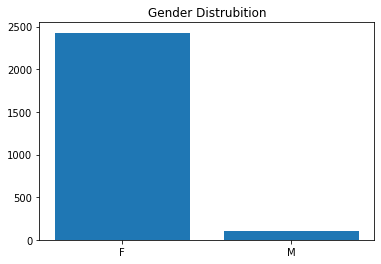

In [ ]:
gender = kill.groupby("gender").sum().index
gender

count = kill.gender.value_counts()
count

plt.bar(gender, count)
plt.title("Gender Distrubition");



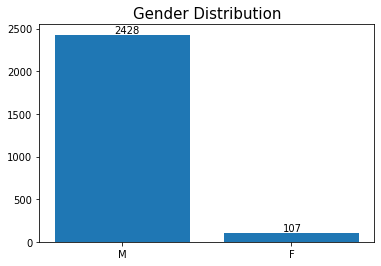

In [ ]:
# with matplotlib


## 2: Plot 7 most common kill weapons

In [ ]:
kill.armed.value_counts().sort_values(ascending = False)[:7]

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [10]:
kill_armed_index = kill_armed_count.index[:8]
kill_armed_index

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'machete', 'unknown weapon'],
      dtype='object')

In [8]:
kill_armed_count = kill["armed"].value_counts().head(8)
kill_armed_count

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
machete             18
unknown weapon      18
Name: armed, dtype: int64

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(kill_armed_index, kill_armed_count.values)
for p in ax.patches:
    ax.text(p.get_x()+0.2, p.get_height()+15, str(p.get_height()))
plt.xticks(rotation = 45);

<IPython.core.display.Javascript object>

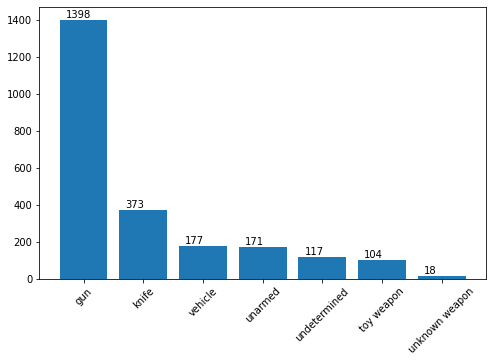

In [ ]:
# with matplotlib


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [18]:
kill["age_cat"] = np.nan

In [19]:
kill["age_cat"].fillna("below25", inplace=True)

In [20]:
kill["age_cat"].loc[kill[kill["age"] > 25].index] = "above25"

In [21]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [22]:
kill.age_cat.value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(kill.age_cat.value_counts().index, kill.age_cat.value_counts().values)


<IPython.core.display.Javascript object>

<BarContainer object of 2 artists>

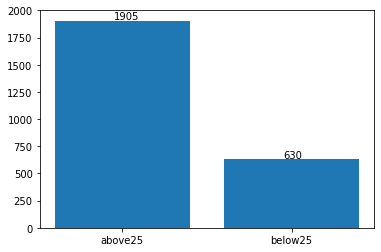

In [ ]:
# with matplotlib


## 4: Plot number of killed poeple by race

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

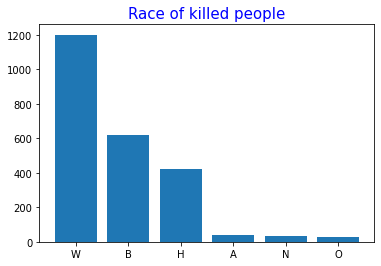

In [ ]:
# with matplotlib


## 5: Killed People According to Races (Pie Chart)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [25]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
 14  age_cat                 

In [26]:
kill.dropna(inplace=True)

In [27]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [28]:
kill_race = kill.race.value_counts(dropna=False)
kill_race

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [29]:
kill_race.values

array([1168,  592,  401,   36,   29,   28])

array([1168,  592,  401,   36,   29,   28])

In [31]:
# matplotlib

plt.figure(figsize=(12,8))
plt.pie(x= kill_race.values, labels=kill_race.index,
        autopct="%.1f%%", radius=1.3,
        explode=[0,0,0.15,0,0,0],
        startangle=60);

<IPython.core.display.Javascript object>